In [1]:
import tensorflow as tf
import pickle
import os
import numpy as np
import scipy.misc
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

C:\Users\KH_Home\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\KH_Home\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\KH_Home\Anaconda3\envs\py35\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\KH_Home\Anaconda3\envs\py35\lib\site-packages\tensorflow\pyth

In [2]:
import loader
import model

In [3]:
config_test = {
    'ID' : 'test_model',
    'n_iter' : 20000,
    'n_prt' : 100,
    'input_h' : 320,
    'input_w' : 320,
    'input_ch' : 3,
    'n_output' : 10,
    'n_batch' : 8,
    'n_save' : 1000,
    'n_history' : 50,
    'LR' : 1e-5,
    'random_crop' : False,
    'training' : False,
}

In [4]:
SegNet_test = model.Hand3DPoseNet(config=config_test)

[FileExistsError] Will you remove directory? [Y/N] Y
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

Model ID : test_model
Model will be saved at : ./test_model


In [5]:
SegNet_test.load('./handseg_01/checkpoint/handseg_01_20000')

INFO:tensorflow:Restoring parameters from ./handseg_01/checkpoint/handseg_01_20000
Model loaded from file : ./handseg_01/checkpoint/handseg_01_20000


In [6]:
evaluation_loader = loader.Data('evaluation')

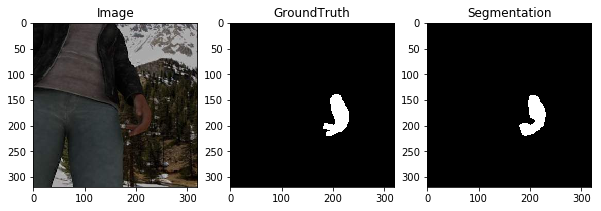

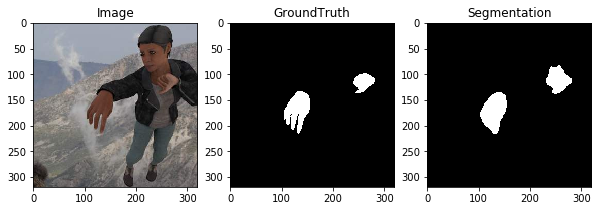

In [9]:
imgs, masks, depths, annos = evaluation_loader.load_batch(8)
mask_pred = SegNet_test.sess.run(SegNet_test.hand_seg_pred, feed_dict = {
    SegNet_test.imgs : imgs,
    SegNet_test.masks : masks,
    SegNet_test.depths : depths
})

mp = np.argmax(mask_pred, axis=3)

for idx in range(2):

    fig = plt.figure(1, figsize=(10,10))
    ax1 = fig.add_subplot('131')
    ax1.set_title('Image')
    ax2 = fig.add_subplot('132')
    ax2.set_title('GroundTruth')
    ax3 = fig.add_subplot('133')
    ax3.set_title('Segmentation')
    
    ax1.imshow(imgs[idx])

    hands = (np.ones(masks.shape) < masks).astype(int)
    ax2.imshow(hands[idx,:,:,0], 'gray')

    ax3.imshow(mp[idx], 'gray')
    plt.show()
    
    fig.savefig('full_figure{}.png'.format(idx))